<a href="https://colab.research.google.com/github/T2sif/ml_test2/blob/main/BlackFriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("BlackFriday.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [ ]:
print("missing values:",data.isnull().any(),"\n")

missing values: User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool 



In [ ]:
data=data.fillna(0)
data_numeric = data[["User_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"]].groupby("User_ID").sum().reset_index().drop("User_ID", axis=1)
#.reset_index() → Moves the index into a new column.

#.drop(["index"], axis=1) → Deletes that unnecessary column.
data_categoric = data.drop_duplicates("User_ID")[["User_ID", "Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"]].reset_index().drop(["index"], axis=1)
#drop_duplicates("User_ID") → Keeps only the first occurrence of each User_ID.
data = pd.concat([data_categoric, data_numeric], axis=1)
data[["Product_Category_2", "Product_Category_3"]] = data[["Product_Category_2", "Product_Category_3"]].astype("int64")
print("\nNumber of customers on Black Friday: ", data.shape[0])
## Total number of rows



Number of customers on Black Friday:  5891


In [ ]:
data.head(10)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,193,132,148,333481
1,1000002,M,55+,16,C,4+,0,334,539,359,810353
2,1000003,M,26-35,15,A,3,0,93,117,148,341635
3,1000004,M,46-50,7,B,2,1,13,102,127,205987
4,1000005,M,26-35,20,A,1,1,659,642,207,821001
5,1000006,F,51-55,9,A,1,0,253,369,232,379450
6,1000007,M,36-45,1,B,1,1,30,163,135,234427
7,1000008,M,26-35,12,C,4+,1,416,558,329,796545
8,1000009,M,26-35,17,C,0,0,335,430,194,593960
9,1000010,F,36-45,1,B,4+,1,1040,1243,884,2169486


<Axes: title={'center': 'Gender'}, ylabel='count'>

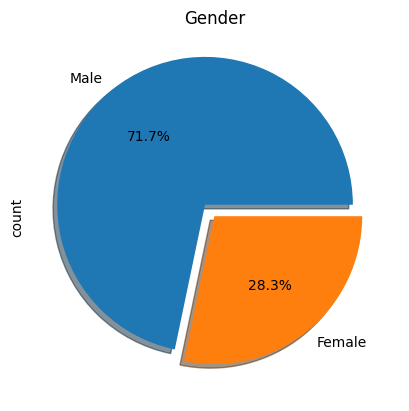

In [ ]:

data["Gender"].value_counts().plot.pie(title="Gender", explode=(0.1, 0), labels=["Male", "Female"], autopct="%1.1f%%", shadow=True)
#explode=(0.1, 0) → Pulls out the first slice (Male) slightly for emphasis.
#autopct="%1.1f%%" → Displays percentage values with 1 decimal place (e.g., 60.0%).
#shadow=True → Adds a shadow effect to the pie chart.

In [ ]:
data["Gender"].value_counts()

,count
Gender,
M,4225
F,1666


<Axes: title={'center': 'Age vs Purchase'}, xlabel='Age'>

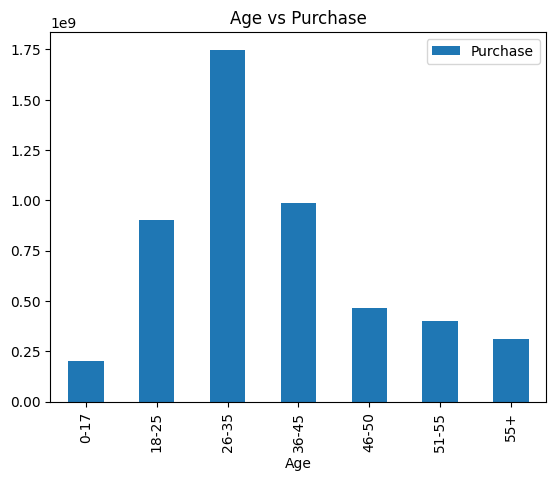

In [ ]:
data[["Age","Purchase"]].groupby("Age").sum().plot.bar(title="Age vs Purchase")


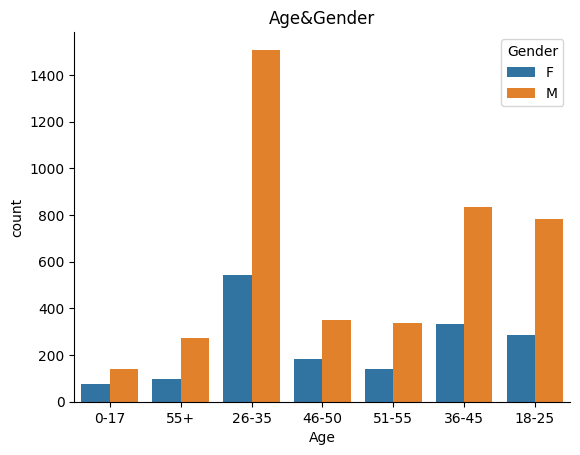

In [ ]:
sns.countplot(data, x = "Age", hue="Gender").set_title("Age&Gender")
sns.despine()
#remove top and right spine


In [ ]:
data.groupby("Gender")["Purchase"].mean()

,Purchase
Gender,
F,876008.343938
M,842186.621775


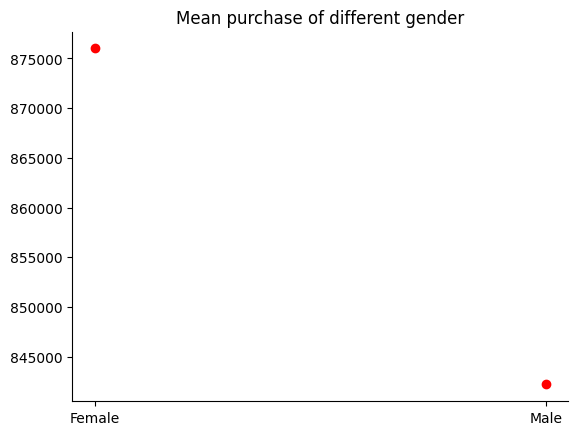

In [ ]:
x = data.groupby("Gender")["Purchase"].mean().index#Extracts the index (which is "Gender", i.e., ["F", "M"]).
y = data.groupby("Gender")["Purchase"].mean().values#Extracts the values
plt.plot(x, y,"ro")
plt.xticks(x, ["Female", "Male"])
plt.title("Mean purchase of different gender")
sns.despine()

<Axes: title={'center': 'City_Category'}, ylabel='User_ID'>

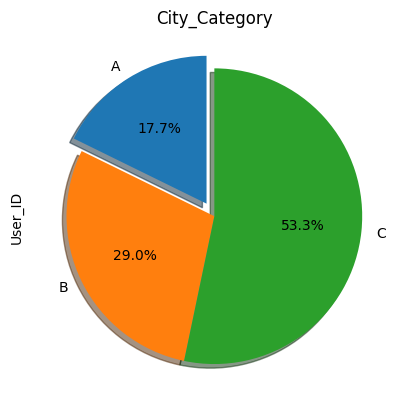

In [ ]:
"""
  Groups the dataset by "City_Category".

Counts the number of unique User_IDs in each city category.

It tells how many users belong to each category (A, B, C)."""
data.groupby("City_Category")["User_ID"].count().plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", shadow=True)


<Axes: title={'center': 'City_Category'}, ylabel='count'>

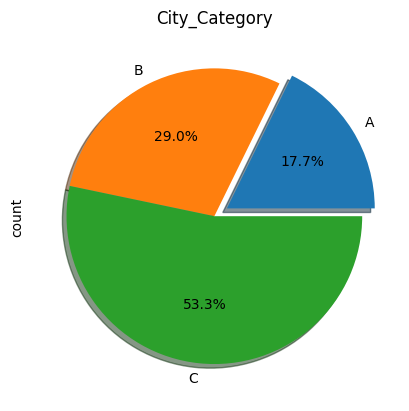

In [ ]:
data["City_Category"].value_counts().sort_index().plot.pie(title="City_Category", explode=(0.1, 0, 0), labels=["A","B","C"], autopct="%1.1f%%", shadow=True)

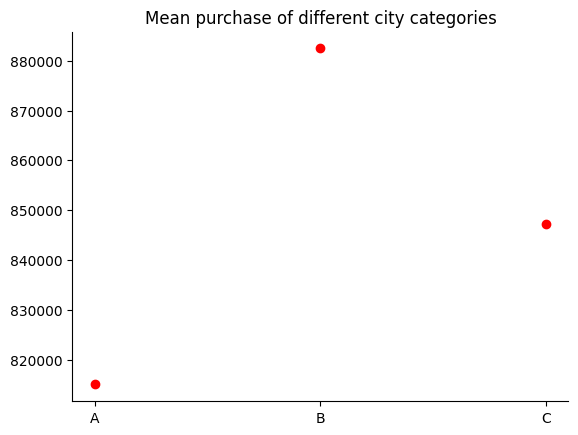

In [ ]:
x = data.groupby("City_Category")["Purchase"].mean().index
y = data.groupby("City_Category")["Purchase"].mean().values
plt.plot(x, y,"ro")
plt.title("Mean purchase of different city categories")
sns.despine()

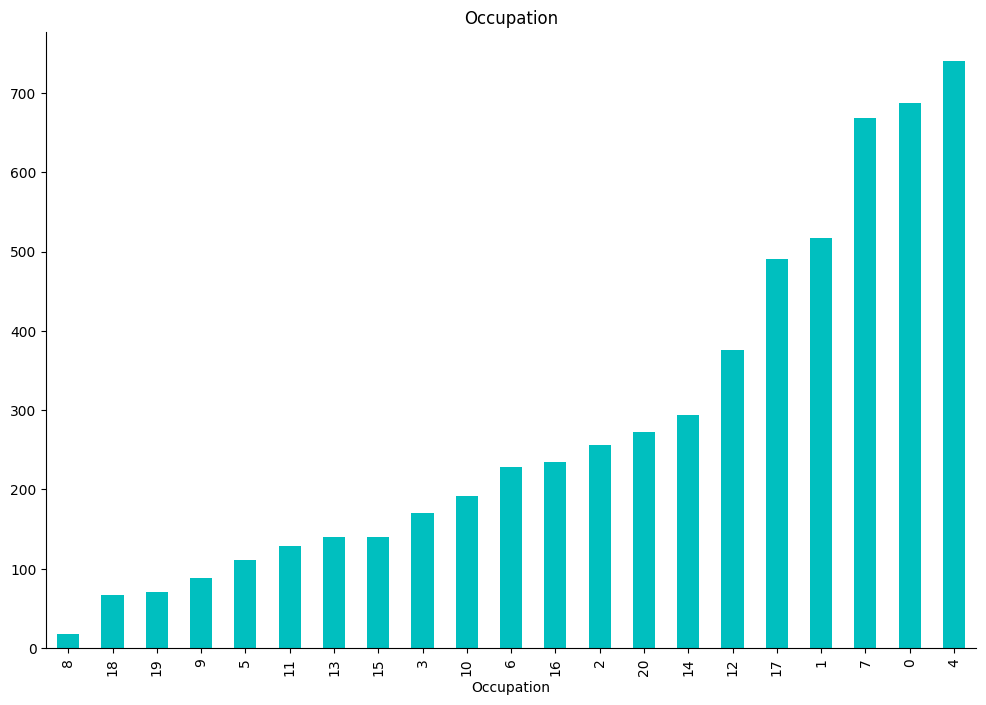

In [ ]:
data["Occupation"].value_counts().sort_values().plot.bar(title="Occupation", color="c", figsize=(12, 8))
sns.despine()

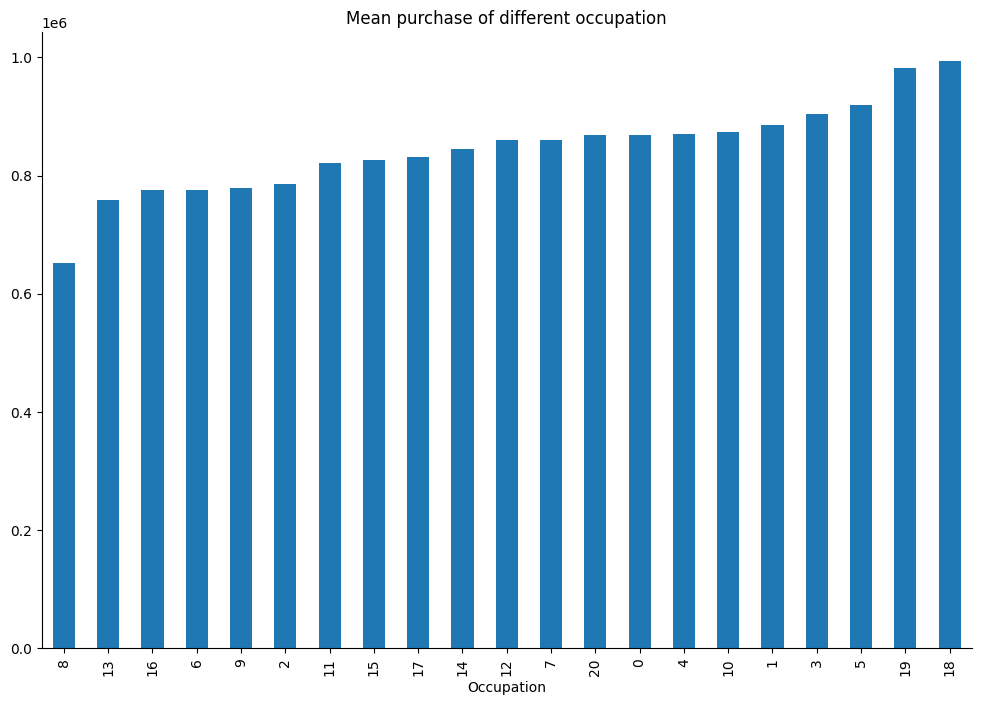

In [ ]:
data.groupby("Occupation")["Purchase"].mean().sort_values(ascending=True).plot.bar(title="Mean purchase of different occupation", figsize=(12, 8))
sns.despine()

<Axes: title={'center': 'Years of staying in the city'}, ylabel='count'>

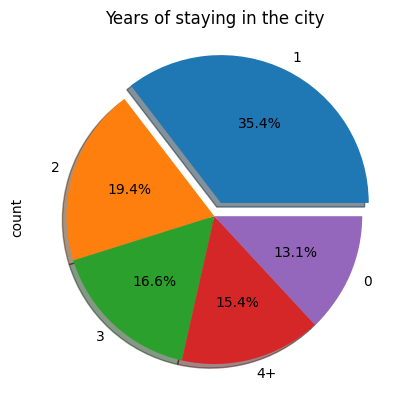

In [ ]:
data["Stay_In_Current_City_Years"].value_counts().plot.pie(title="Years of staying in the city", explode=(0.1, 0, 0, 0, 0), autopct="%1.1f%%", shadow=True)

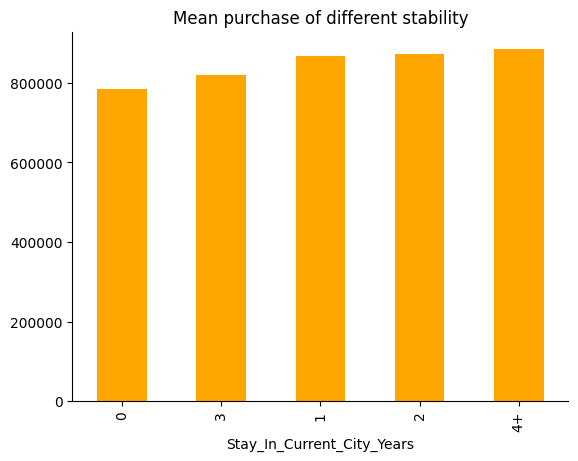

In [ ]:
data.groupby("Stay_In_Current_City_Years")["Purchase"].mean().sort_values().plot.bar(title="Mean purchase of different stability", color="orange")
sns.despine()

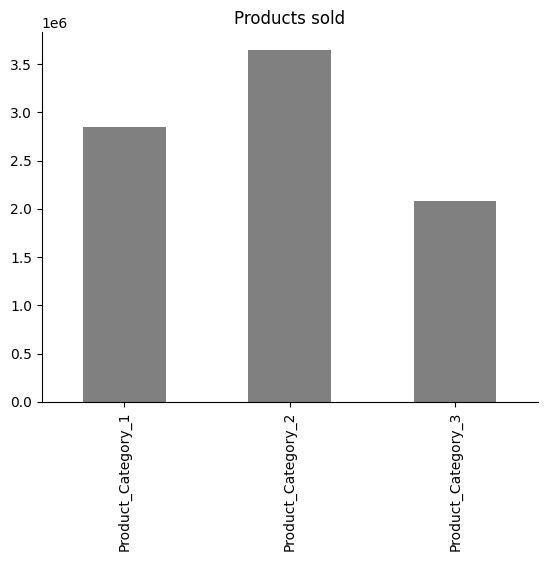

In [ ]:
data.sum()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Products sold", color="grey")
sns.despine()

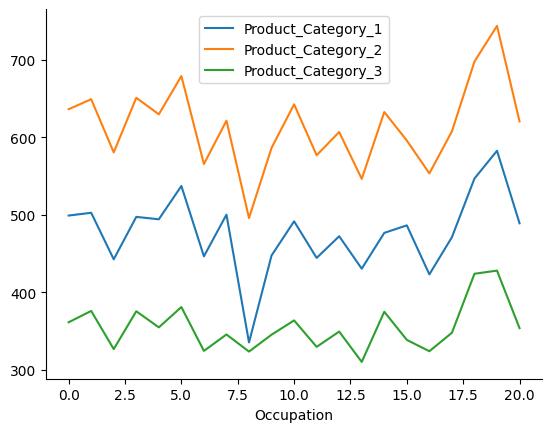

In [ ]:
data.groupby(["Occupation"])[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].mean().plot.line(title="")
sns.despine()

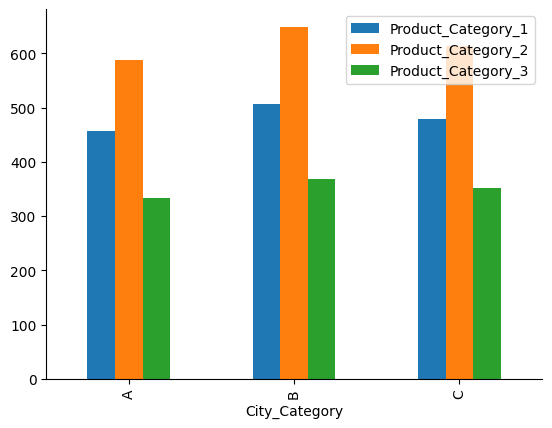

In [ ]:
data.groupby(["City_Category"])[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].mean().plot.bar(title="")
sns.despine()


Predict future sales(Purchase)

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


Text(0.5, 1.0, 'Correlation between features')

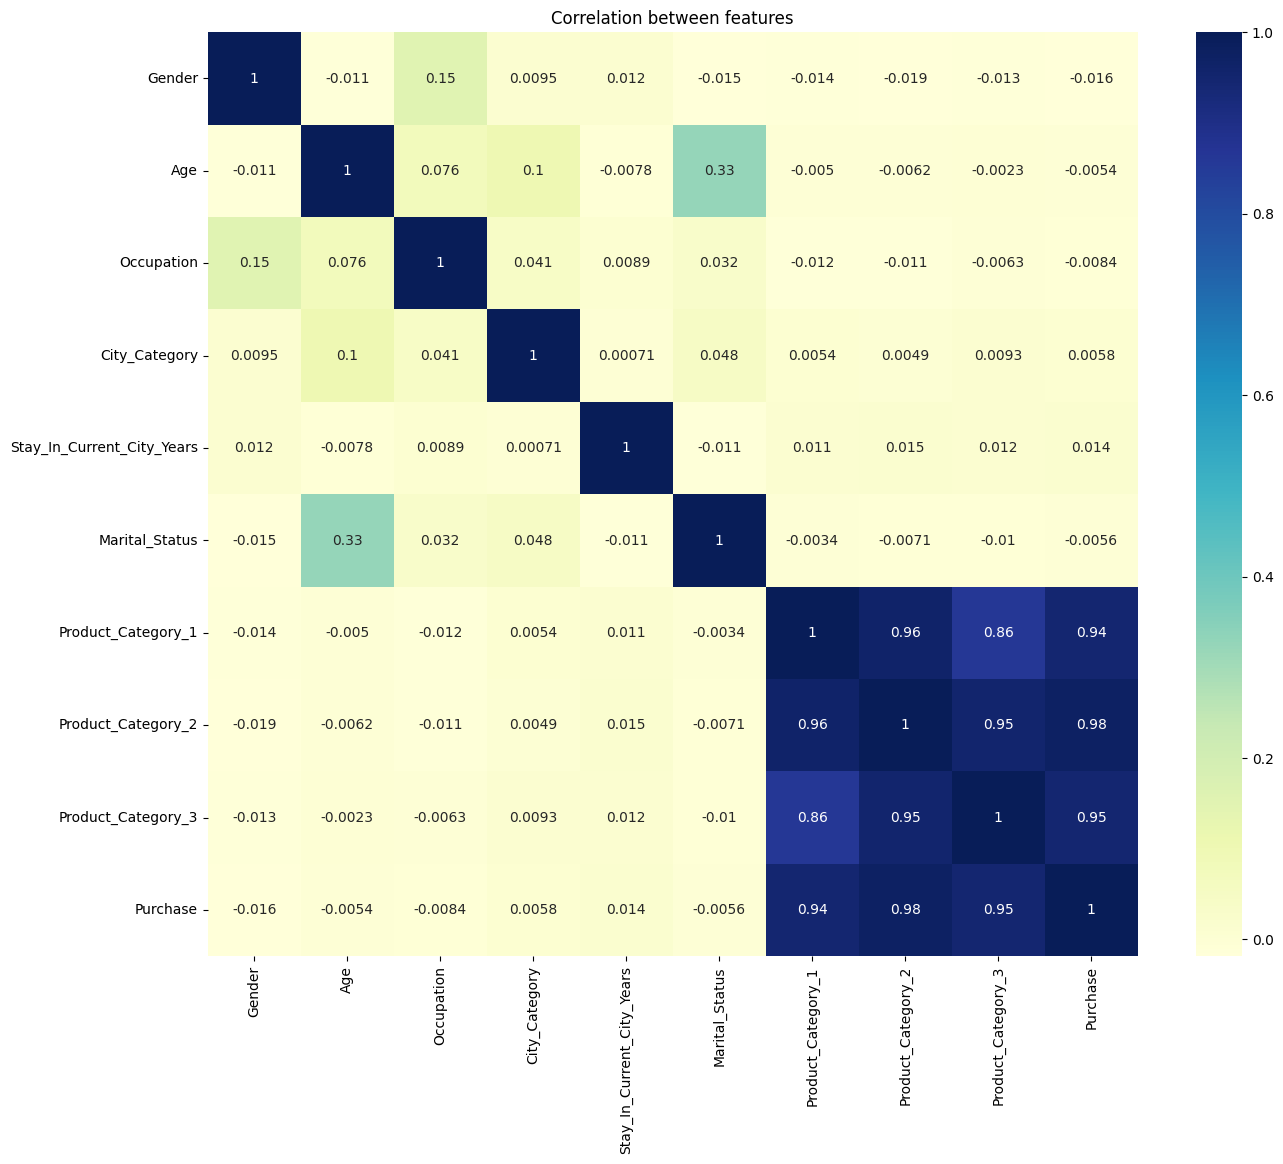

In [ ]:
# label encoding: categorical to numeric
le = preprocessing.LabelEncoder()
cat_col = data.select_dtypes(include="object").columns.tolist()
print(cat_col)
for i in cat_col:
    data.loc[:, i] = le.fit_transform(data.loc[:, i])

fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(data.drop("User_ID", axis=1).corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features")

In [ ]:
predictor = data.drop("Purchase", axis=1)
target = data["Purchase"]

In [ ]:
# find the best parameter for model making
param_grid = {"n_estimators":[1, 5, 10, 50, 100, 150, 300, 500], \
              "max_depth":[1, 3, 5, 7, 9]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring="neg_mean_squared_error").fit(predictor, target)
print("Best parameter: {}".format(grid_rf.best_params_))
print("Best score: {:.2f}".format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 9, 'n_estimators': 300}
Best score: 193683.76


In [ ]:
# make model with best parameters
model = RandomForestRegressor(n_estimators=50, max_depth=9, random_state=1, verbose=1)

In [ ]:
# predict with cross validation
scores = cross_val_score(model, predictor, target, scoring="explained_variance", cv=5)
print(scores)
print("Model effectiveness: %f" % (scores.mean()))

scores

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


[0.95225385 0.95902164 0.95749733 0.95174155 0.95722588]
Model effectiveness: 0.955548


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


array([0.95225385, 0.95902164, 0.95749733, 0.95174155, 0.95722588])

In [ ]:
new_customer = pd.DataFrame({
    "User_ID": [1000001],
    "Gender": [1],  # Male (after Label Encoding)
    "Age": [3],  # Encoded value for '26-35'
    "Occupation": [10],
    "City_Category": [2],  # Encoded value for 'B'
    "Stay_In_Current_City_Years": [2],
    "Marital_Status": [0],
    "Product_Category_1": [5],
    "Product_Category_2": [3],
    "Product_Category_3": [2]
})


In [ ]:
# Train (fit) the model with the best parameters
model = RandomForestRegressor(n_estimators=50, max_depth=9, random_state=1, verbose=1)
model.fit(predictor, target)  # Train the model

# Now the model is ready for prediction
predicted_purchase = model.predict(new_customer)
print("Predicted Purchase Amount:", predicted_purchase[0])


Predicted Purchase Amount: 82884.83053651052


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
